# **Title: Bike Details Dataset**

In [86]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/BIKE DETAILS.csv')
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [2]:
# 1. What is the range of selling prices in the dataset.
import pandas as pd
import numpy as np
df=pd.read_csv('/content/BIKE DETAILS.csv')
price_range = df['selling_price'].max() - df['selling_price'].min()
print(f"The range of selling prices is: {price_range}")

The range of selling prices is: 755000


In [3]:
# 2.What is the median selling price for bikes in the dataset?
median_selling_price = df['selling_price'].median()
print(f"The median selling price for bikes in the dataset is: {median_selling_price}")

The median selling price for bikes in the dataset is: 45000.0


In [4]:
# 3.What is the most common seller type?
counts = df['seller_type'].value_counts()
most_common_seller_type = counts.idxmax()
print(f"The most common seller type is: {most_common_seller_type}")

The most common seller type is: Individual


In [5]:
# 4. How many bikes have driven more than 50,000 kilometers?
count = df[df['km_driven'] > 50000].shape[0]
print(f"There are {count} bikes that have driven more than 50,000 kilometers.")

There are 170 bikes that have driven more than 50,000 kilometers.


In [6]:
# 5.What is the average km_driven value for each ownership type?
average_km_driven = df.groupby('owner')['km_driven'].mean()
print("The average km_driven value for each ownership type is:")
print(average_km_driven)

The average km_driven value for each ownership type is:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [7]:
# 6.What proportion of bikes are from the year 2015 or older?
count = df[df['year'] >= 2015].shape[0]
total_count = df.shape[0]
proportion = count / total_count
print(f"The proportion of bikes that are from the year 2015 or older is: {proportion}")

The proportion of bikes that are from the year 2015 or older is: 0.527803958529689


In [8]:
# 7. What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
print("The trend of missing values across the dataset is:")
print(missing_values)

The trend of missing values across the dataset is:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [9]:
# 8.What is the highest ex_showroom_price recorded, and for which bike?
highest_price = df['ex_showroom_price'].max()
bike_with_highest_price = df[df['ex_showroom_price'] == highest_price]
print(f"The highest ex_showroom_price recorded is: {highest_price}")
print("The bike with the highest ex_showroom_price is:")
print(bike_with_highest_price)

The highest ex_showroom_price recorded is: 1278000.0
The bike with the highest ex_showroom_price is:
                           name  selling_price  year seller_type      owner  \
134  Harley-Davidson Street Bob         750000  2013  Individual  2nd owner   

     km_driven  ex_showroom_price  
134      12000          1278000.0  


In [10]:
# 9.What is the total number of bikes listed by each seller type?
bike_count = df['seller_type'].value_counts()
print("The total number of bikes listed by each seller type is:")
print(bike_count)

The total number of bikes listed by each seller type is:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [11]:
# 10.What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_bikes = df[df['owner'] == 'First Owner']
selling_price_km_driven = first_owner_bikes[['selling_price', 'km_driven']]
correlation = selling_price_km_driven.corr()
print("The relationship between selling_price and km_driven for first-owner bikes is:")
print(correlation)

The relationship between selling_price and km_driven for first-owner bikes is:
               selling_price  km_driven
selling_price            NaN        NaN
km_driven                NaN        NaN


In [13]:
# 11.Identify and remove outliers in the km_driven column using the IQR method.
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df['km_driven'] < (Q1 - 1.5 * IQR)) | (df['km_driven'] > (Q3 + 1.5 * IQR))
outlier_indices = df[outlier_mask].index
df_cleaned = df.drop(outlier_indices)

print("DataFrame shape before removing outliers:", df.shape)
print("DataFrame shape after removing outliers:", df_cleaned.shape)

DataFrame shape before removing outliers: (1061, 7)
DataFrame shape after removing outliers: (1022, 7)


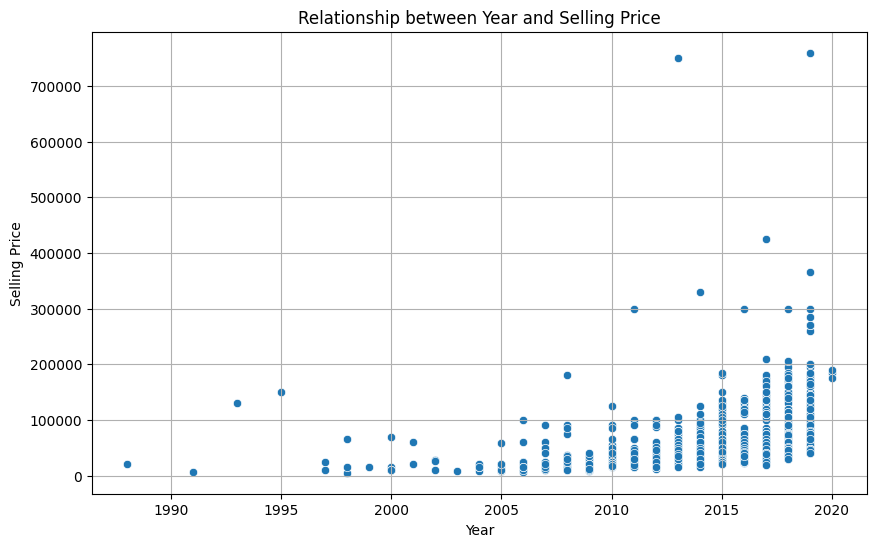

In [14]:
# 12.Perform a bivariate analysis to visualize the relationship between year and selling_price.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='selling_price')

plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()


In [15]:
# 13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
current_year = 2025
df['age'] = current_year - df['year']
df['depreciation'] = df['selling_price'] - df['ex_showroom_price']
average_depreciation = df.groupby('age')['depreciation'].mean()
print("The average depreciation in selling price based on the bike's age is:")
print(average_depreciation)

The average depreciation in selling price based on the bike's age is:
age
5     34260.000000
6     -2954.562500
7    -13023.194805
8    -22306.082353
9    -28328.190476
10   -28013.275000
11   -34505.606061
12   -43086.886792
13   -37317.648649
14   -47102.666667
15   -45658.928571
16   -38227.785714
17   -54732.428571
18   -42399.000000
19   -39664.500000
20   -44852.000000
21   -36852.000000
22             NaN
23             NaN
24   -34852.000000
25             NaN
26             NaN
27             NaN
28             NaN
30             NaN
32             NaN
34             NaN
37             NaN
Name: depreciation, dtype: float64


In [16]:
# 14.Which bike names are priced significantly above the average price for their manufacturing year?
average_price_by_year = df.groupby('year')['selling_price'].mean()
df['average_price_year'] = df['year'].map(average_price_by_year)
df['price_difference'] = df['selling_price'] - df['average_price_year']
significant_prices = df[df['price_difference'] > 2 * df['price_difference'].std()]
print("Bike names priced significantly above the average price for their manufacturing year:")
print(significant_prices['name'])

Bike names priced significantly above the average price for their manufacturing year:
7      Royal Enfield Bullet 350 [2007-2011]
13                            Yamaha YZF R3
130        Royal Enfield Continental GT 650
134              Harley-Davidson Street Bob
146                              KTM RC 390
242                              KTM RC 390
261           Royal Enfield Interceptor 650
288                              KTM RC 390
289          Kawasaki Ninja 650 [2018-2019]
295                         Suzuki GSX S750
311              Harley-Davidson Street 750
315           Royal Enfield Interceptor 650
344                              BMW G310GS
407           Royal Enfield Interceptor 650
411            KTM 390 Duke ABS [2013-2016]
449           Royal Enfield Classic Signals
860          Kawasaki Ninja 650 [2018-2019]
890            Royal Enfield Classic Chrome
892                            KTM 390 Duke
897                      Kawasaki Ninja 300
Name: name, dtype: object


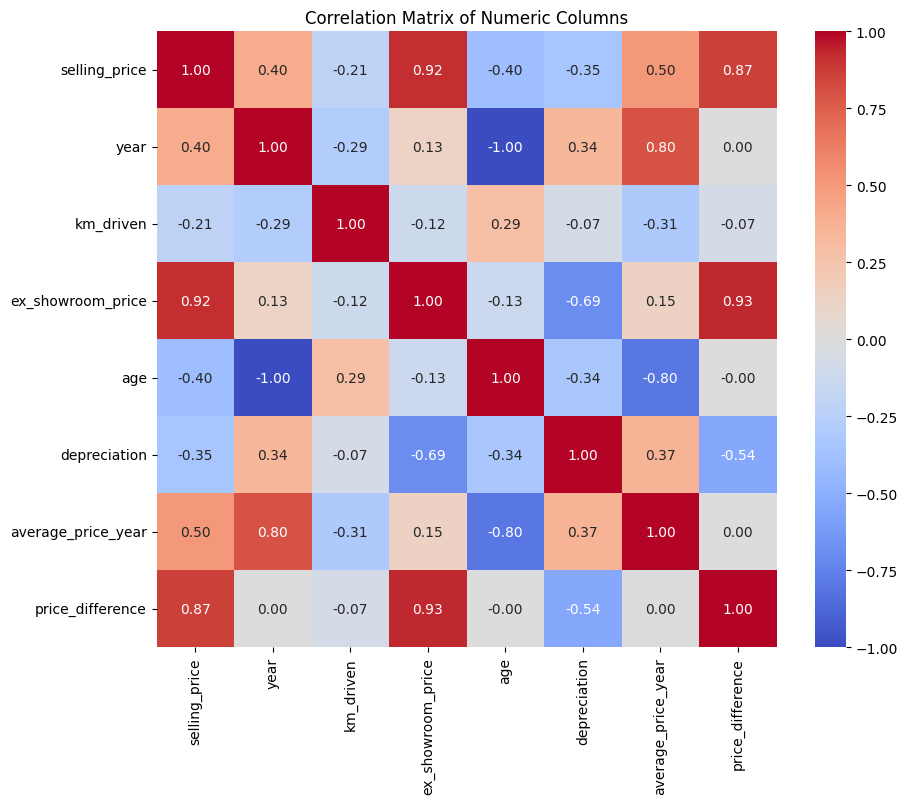

In [17]:
# 15.Develop a correlation matrix for numeric columns and visualize it using a heatmap.
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# **Title: Car Sale Dataset**

In [18]:
import pandas as pd
import numpy as np
df1=pd.read_csv('/content/Car Sale.csv')
df1.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [20]:
# 1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?
average_selling_price = df1.groupby('Dealer_Name')['Price ($)'].mean()

print("The average selling price of cars for each dealer is:")
print(average_selling_price)

The average selling price of cars for each dealer is:
Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                        

In [21]:
# 2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
price_variation = df1.groupby('Company')['Price ($)'].std()
highest_variation_brand = price_variation.idxmax()
print(f"The car brand with the highest variation in prices is: {highest_variation_brand}")

The car brand with the highest variation in prices is: Lincoln


<Axes: xlabel='Transmission', ylabel='Price ($)'>

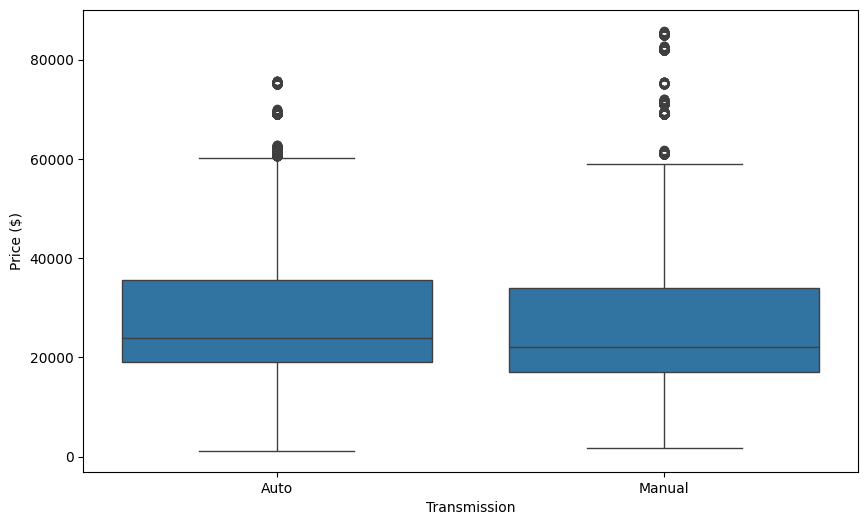

In [22]:
# 3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Transmission', y='Price ($)')

<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

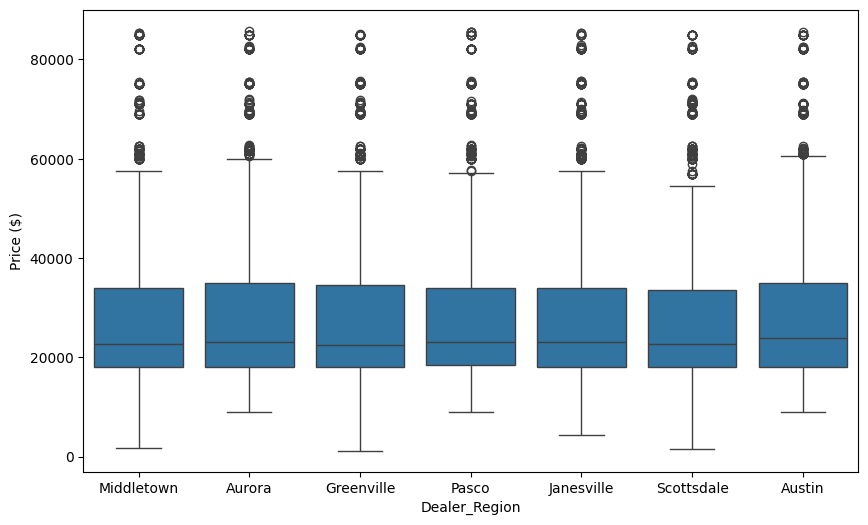

In [23]:
# 4.What is the distribution of car prices across different regions?
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Dealer_Region', y='Price ($)')

In [24]:
# 5.What is the distribution of cars based on body styles?
body_style_counts = df1['Body Style'].value_counts()
print("The distribution of cars based on body styles is:")
print(body_style_counts)

The distribution of cars based on body styles is:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


In [88]:
# 6.How does the average selling price of cars vary by customer gender and annual income?
avg_price_by_gender = df1.groupby('Gender')['Price ($)'].mean()
print("Average Selling Price by Gender:")
print(avg_price_by_gender)

income_bins = [0, 50000, 100000, 500000, 1000000, 5000000, float('inf')]
income_labels = ['0-50K', '50K-100K', '100K-500K', '500K-1M', '1M-5M', '5M+']
df1['Income Bracket'] = pd.cut(df1['Annual Income'], bins=income_bins, labels=income_labels, right=False)

avg_price_by_gender_income = df1.groupby(['Gender', 'Income Bracket'])['Price ($)'].mean().unstack()
print("\nAverage Selling Price by Gender and Income Bracket:")
avg_price_by_gender_income

Average Selling Price by Gender:
Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64

Average Selling Price by Gender and Income Bracket:


<ipython-input-88-f46052cf03d1>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_gender_income = df1.groupby(['Gender', 'Income Bracket'])['Price ($)'].mean().unstack()


Income Bracket,0-50K,50K-100K,100K-500K,500K-1M,1M-5M,5M+
Gender,,,,,,
Female,28132.038732,NaN,28502.055062,28071.197807,28646.115975,27222.444444
Male,27816.302247,43000.0,28506.557505,27960.837309,28140.849393,30693.448276


<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

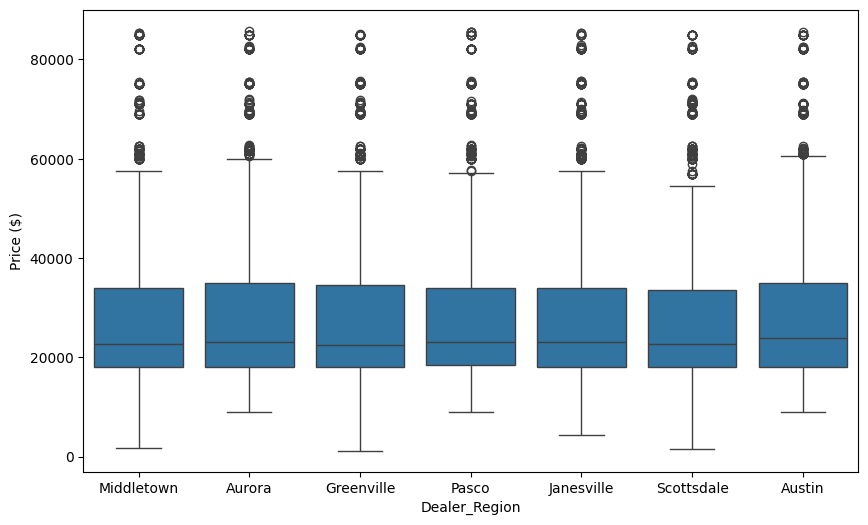

In [26]:
# 7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Dealer_Region', y='Price ($)')

<Axes: xlabel='Engine', ylabel='Price ($)'>

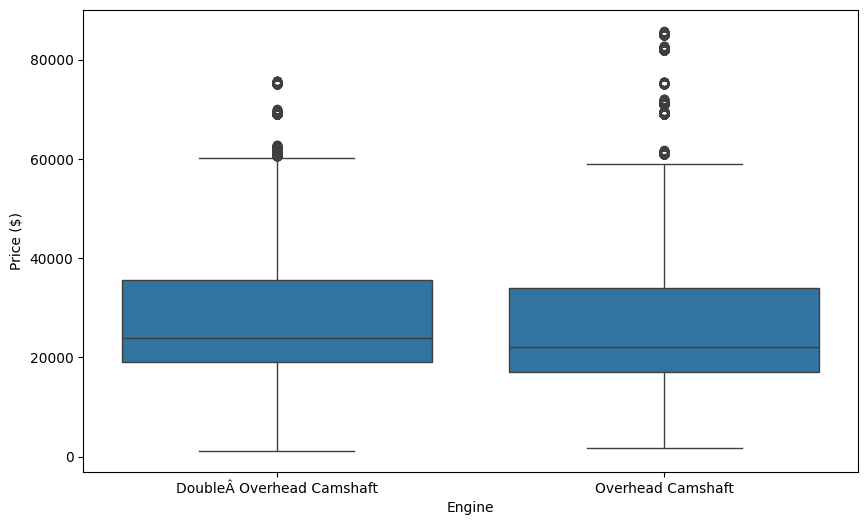

In [27]:
# 8.How does the average car price differ between cars with different engine sizes?
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Engine', y='Price ($)')

In [28]:
# 9.How do car prices vary based on the customer’s annual income bracket?

income_bins = [0, 50000, 100000, 250000, 500000, 1000000, 2000000]
income_labels = ['<50K', '50K-100K', '100K-250K', '250K-500K', '500K-1M', '1M-2M']
df1['Income Bracket'] = pd.cut(df1['Annual Income'], bins=income_bins, labels=income_labels)

# Group by income bracket
summary = df1.groupby('Income Bracket')['Price ($)'].agg(['mean', 'count']).reset_index()
summary.columns = ['Income Bracket', 'Average Price ($)', 'Number of Customers']
print(summary)


  Income Bracket  Average Price ($)  Number of Customers
0           <50K       27884.297820                 5275
1       50K-100K       43000.000000                    1
2      100K-250K       28944.688889                   45
3      250K-500K       28555.392229                 2162
4        500K-1M       28011.726423                 8875
5          1M-2M       28016.841147                 6207


<ipython-input-28-cda2393d71a1>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df1.groupby('Income Bracket')['Price ($)'].agg(['mean', 'count']).reset_index()


In [29]:
# 10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_models = df1.groupby('Model')['Price ($)'].count().nlargest(5)
top_models_df = df1[df1['Model'].isin(top_models.index)]
print("The top 5 car models with the highest number of sales are:")
print(top_models)

The top 5 car models with the highest number of sales are:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: Price ($), dtype: int64


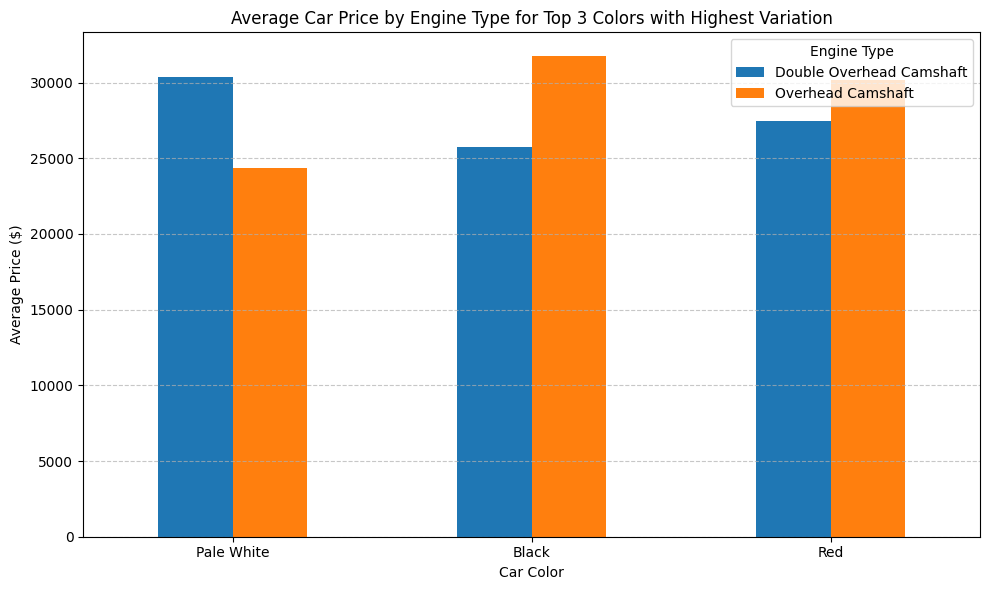

In [30]:
# 11.How does car price vary with engine size across different car colors, and which colors have the highest price variation?
import pandas as pd
import matplotlib.pyplot as plt

df1['Engine'] = df1['Engine'].str.replace('Â\xa0', ' ').str.strip()

price_by_color_engine = df1.groupby(['Color', 'Engine'])['Price ($)'].mean().unstack()
price_by_color_engine['Price_Variation'] = price_by_color_engine.max(axis=1) - price_by_color_engine.min(axis=1)
top_colors = price_by_color_engine.sort_values(by='Price_Variation', ascending=False).head(3)

top_colors[['Double Overhead Camshaft', 'Overhead Camshaft']].plot(kind='bar', figsize=(10, 6))
plt.title('Average Car Price by Engine Type for Top 3 Colors with Highest Variation')
plt.ylabel('Average Price ($)')
plt.xlabel('Car Color')
plt.xticks(rotation=0)
plt.legend(title='Engine Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


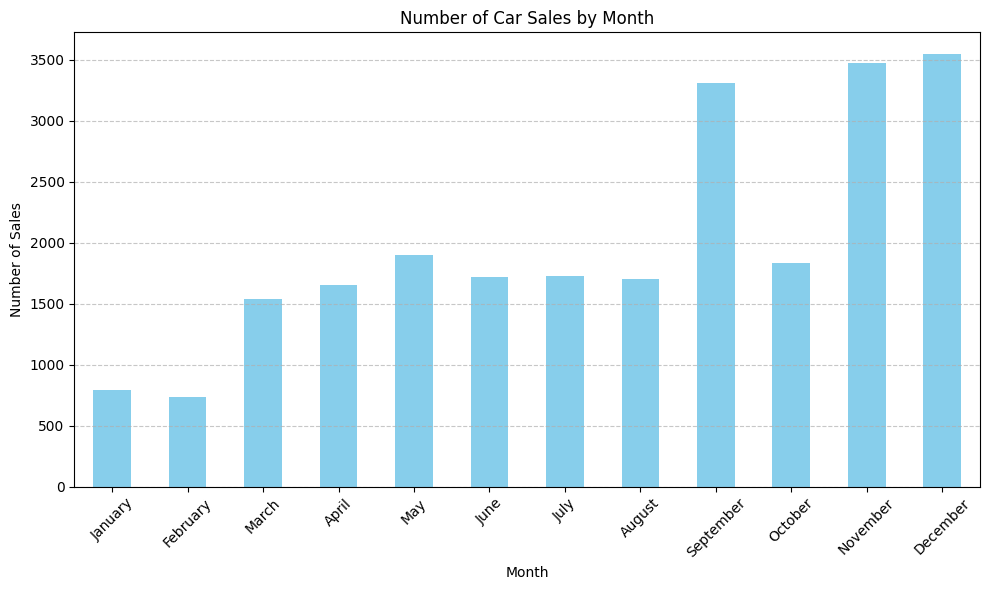

In [32]:
# 12.Is there any seasonal trend in car sales based on the date of sale

df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

df1['Month'] = df1['Date'].dt.month_name()

monthly_sales = df1['Month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

monthly_sales.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Number of Car Sales by Month")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Axes: xlabel='Body Style', ylabel='Price ($)'>

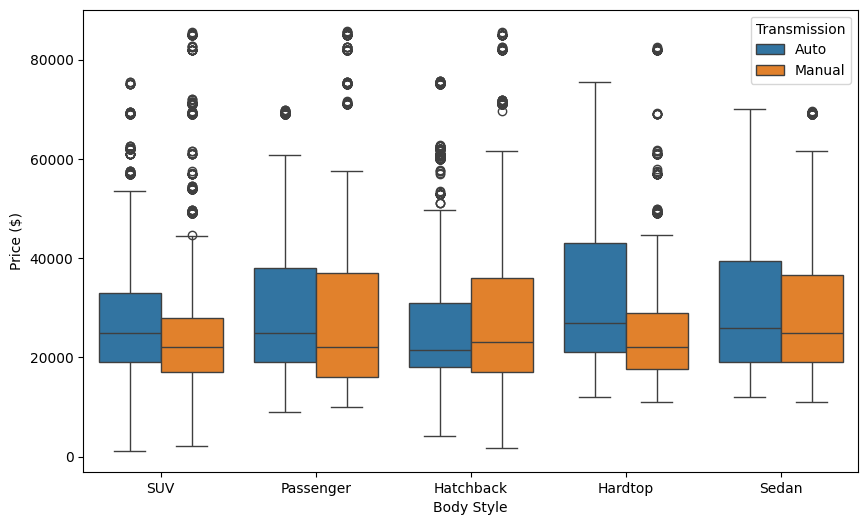

In [33]:
# 13.How does the car price distribution change when considering different combinations of body style and transmission type?
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Body Style', y='Price ($)', hue='Transmission')


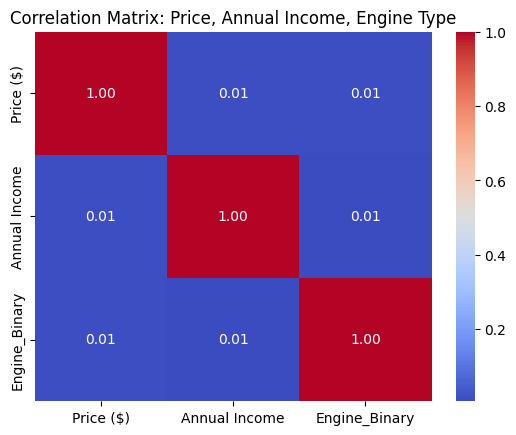

In [34]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

df1['Engine'] = df1['Engine'].str.replace('Â\xa0', ' ').str.strip()
df1['Engine_Binary'] = df1['Engine'].map({
    'Overhead Camshaft': 0,
    'Double Overhead Camshaft': 1
})

df1['Price ($)'] = pd.to_numeric(df1['Price ($)'], errors='coerce')
df1['Annual Income'] = pd.to_numeric(df1['Annual Income'], errors='coerce')

corr_df = df1[['Price ($)', 'Annual Income', 'Engine_Binary']].dropna()
corr_matrix = corr_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Price, Annual Income, Engine Type")
plt.show()


In [35]:
# 15.How does the average car price vary across different car models and engine types?

df1['Engine'] = df1['Engine'].str.replace('Â\xa0', ' ').str.strip()

df1['Price ($)'] = pd.to_numeric(df1['Price ($)'], errors='coerce')
model_engine_price = df1.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

model_engine_price = model_engine_price.sort_values(by='Price ($)', ascending=False)

print(model_engine_price.head(10))


           Model                    Engine     Price ($)
212           SC         Overhead Camshaft  61074.818182
198       Ranger  Double Overhead Camshaft  61064.055556
222        Sable         Overhead Camshaft  61039.770833
56        Catera  Double Overhead Camshaft  56836.933333
143        LX470         Overhead Camshaft  54037.490196
139        LS400         Overhead Camshaft  53157.941558
111        GS400         Overhead Camshaft  53086.000000
239       Tacoma  Double Overhead Camshaft  53085.821918
25        Aurora         Overhead Camshaft  51833.556962
173  Park Avenue  Double Overhead Camshaft  49387.750000


# **Amazon Sales Data**

In [79]:
import pandas as pd
import numpy as np
df2=pd.read_csv('/content/amazon.csv')
df2.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [80]:
# 1.What is the average rating for each product category?
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')

category_ratings = df2.groupby('category')['rating'].mean().reset_index()

category_ratings = category_ratings.sort_values(by='rating', ascending=False)
print(category_ratings)

                                              category  rating
57                       Computers&Accessories|Tablets     4.6
48   Computers&Accessories|NetworkingDevices|Networ...     4.5
62    Electronics|Cameras&Photography|Accessories|Film     4.5
38             Computers&Accessories|Components|Memory     4.5
81   Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
..                                                 ...     ...
3    Computers&Accessories|Accessories&Peripherals|...     3.6
88   Electronics|HomeTheater,TV&Video|Accessories|3...     3.5
2    Computers&Accessories|Accessories&Peripherals|...     3.5
14   Computers&Accessories|Accessories&Peripherals|...     3.4
146  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...     3.3

[211 rows x 2 columns]


In [83]:
# 2. What are the top rating_count products by category?
df2['rating_count'] = pd.to_numeric(df2['rating_count'], errors='coerce')

df2 = df2.dropna(subset=['category', 'rating_count'])

top_products = df2.sort_values('rating_count', ascending=False).groupby('category').head(1)

print(top_products[['category', 'rating_count']])

                                               category  rating_count
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...         992.0
750   Electronics|GeneralPurposeBatteries&BatteryCha...         989.0
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...         976.0
823   Computers&Accessories|Accessories&Peripherals|...         974.0
1272  Home&Kitchen|Heating,Cooling&AirQuality|WaterH...         959.0
...                                                 ...           ...
529   Electronics|Mobiles&Accessories|MobileAccessor...         104.0
934   Computers&Accessories|ExternalDevices&DataStor...          74.0
210         Electronics|HomeTheater,TV&Video|Projectors          27.0
775   Computers&Accessories|Accessories&Peripherals|...          23.0
1222  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           7.0

[83 rows x 2 columns]


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


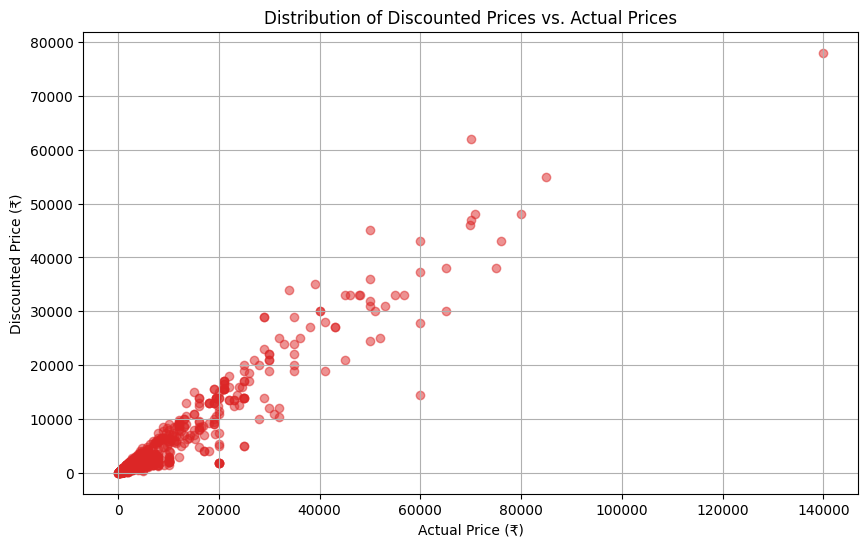

Discounted Price Stats:
count     1465.000000
mean      3125.310874
std       6944.304394
min         39.000000
25%        325.000000
50%        799.000000
75%       1999.000000
max      77990.000000
Name: discounted_price, dtype: float64

Actual Price Stats:
count      1465.000000
mean       5444.990635
std       10874.826864
min          39.000000
25%         800.000000
50%        1650.000000
75%        4295.000000
max      139900.000000
Name: actual_price, dtype: float64


In [84]:
# 3.What is the distribution of discounted prices vs. actual prices?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("amazon.csv")

# Check column names to find actual price vs discounted price
print(df.columns)

df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

plt.figure(figsize=(10, 6))
plt.scatter(df['actual_price'], df['discounted_price'], alpha=0.5, color='#dc2626')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Discounted Price (₹)')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.grid(True)
plt.show()

print("Discounted Price Stats:")
print(df['discounted_price'].describe())
print("\nActual Price Stats:")
print(df['actual_price'].describe())

In [60]:
# 4. How does the average discount percentage vary across categories?
import pandas as pd

# Load your dataset
df = pd.read_csv("amazon.csv")

df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
df['main_category'] = df['category'].str.split('|').str[0]
avg_discount_by_category = df.groupby('main_category')['discount_percentage'].mean().round(2)

print("Average Discount Percentage by Category:")
print(avg_discount_by_category.sort_values(ascending=False))


Average Discount Percentage by Category:
main_category
HomeImprovement          57.50
Computers&Accessories    54.02
Health&PersonalCare      53.00
Electronics              50.83
MusicalInstruments       46.00
Car&Motorbike            42.00
Home&Kitchen             40.12
OfficeProducts           12.35
Toys&Games                0.00
Name: discount_percentage, dtype: float64


In [44]:
# 5.What are the most popular product names?
import pandas as pd
df = pd.read_csv("amazon.csv")

df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df = df.dropna(subset=['product_name', 'rating_count'])

popular_products = df.groupby('product_name')['rating_count'].sum().reset_index()
popular_products = popular_products.sort_values(by='rating_count', ascending=False)
print(popular_products.head(10))

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
                                          product_name  rating_count
86   Duracell USB Lightning Apple Certified (Mfi) B...        2445.0
292  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...        1948.0
39   Ambrane 2 in 1 Type-C & Micro USB Cable with 6...        1806.0
279  Wecool Unbreakable 3 in 1 Charging Cable with ...        1312.0
248  Sounce 65W OnePlus Dash Warp Charge Cable, 6.5...        1151.0
231  SWAPKART Fast Charging Cable and Data Sync USB...        1072.0
96   Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0
98        Eveready Red 1012 AAA Batteries - Pack of 10         989.0
204  Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0
293  Zoul USB Ty

In [56]:
# 6. What are the most popular product keywords?
import pandas as pd
from collections import Counter
import re

# Load dataset
df = pd.read_csv("amazon.csv")

keywords_col = 'category'
df = df.dropna(subset=[keywords_col])

# Combine all keywords into one big list
all_keywords = df[keywords_col].str.lower().str.replace('[^a-z0-9, ]', '', regex=True).str.split(',')

# Flatten the list
flat_keywords = [kw.strip() for sublist in all_keywords for kw in sublist if kw.strip()]

# Count keyword frequencies
keyword_counts = Counter(flat_keywords)

# Convert to DataFrame and sort
popular_keywords_df = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Frequency'])
popular_keywords_df = popular_keywords_df.sort_values(by='Frequency', ascending=False)

# Display top 20 keywords
print(popular_keywords_df.head(20))


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
                                               Keyword  Frequency
0    computersaccessoriesaccessoriesperipheralscabl...        233
2                               electronicshometheater        162
153                                 homekitchenheating        116
156             homekitchenkitchenhomeappliancesvacuum         82
21           electronicswearabletechnologysmartwatches         76
23   electronicsmobilesaccessoriessmartphonesbasicm...         68
26                               electronicsheadphones         66
4                   tvvideotelevisionssmarttelevisions         63
49   computersaccessoriesaccessoriesperipheralskeyb...         60
157                               cleaningiron

In [49]:
# 7.What are the most popular product reviews?
import pandas as pd

# Load dataset
df = pd.read_csv("amazon.csv")

# Inspect column names to find review-related columns
print(df.columns)

# Make sure necessary columns exist and are cleaned
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df = df.dropna(subset=['product_name', 'rating_count', 'review_content'])  # Adjust 'Review' column name as needed

# Sort reviews by rating count
top_reviews = df.sort_values(by='rating_count', ascending=False)

# Show top 10 most popular product reviews
print(top_reviews[['product_name', 'review_content', 'rating_count']].head(10))


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
                                           product_name  \
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...   
750        Eveready Red 1012 AAA Batteries - Pack of 10   
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...   
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
151   Zoul USB Type C Fast Charging 3A Nylon Braided...   
1272  Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...   
1259  Hindware Atlantic Xceed 5L 3kW Instant Water H...   
214   Crypo™ Universal Remote Compatible with Tata S...   
1262  iBELL Castor CTEK15L Premium 1.5 Litre Stainle...   

                                         review_content 

In [50]:
# 8. What is the correlation between discounted_price and rating?
import pandas as pd

# Load your dataset
df = pd.read_csv("amazon.csv")

# View first few entries to check data format
print(df[['discounted_price', 'rating']].head(10))

# Convert columns to numeric if necessary
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with missing values in those columns
filtered_df = df[['discounted_price', 'rating']].dropna()

# Calculate correlation
correlation = filtered_df.corr()
print("Correlation between discounted price and rating:\n", correlation)


  discounted_price rating
0             ₹399    4.2
1             ₹199    4.0
2             ₹199    3.9
3             ₹329    4.2
4             ₹154    4.2
5             ₹149    3.9
6          ₹176.63    4.1
7             ₹229    4.3
8             ₹499    4.2
9             ₹199    4.0
Correlation between discounted price and rating:
                   discounted_price  rating
discounted_price               NaN     NaN
rating                         NaN     NaN


In [52]:
# 9. What are the Top 5 categories based on the highest ratings?
import pandas as pd

# Load dataset
df = pd.read_csv("amazon.csv")

# Convert rating to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with missing category or rating
df = df.dropna(subset=['category', 'rating'])

# Group by Category and calculate average rating
avg_ratings = df.groupby('category')['rating'].mean().reset_index()

# Sort by rating in descending order
top_5_categories = avg_ratings.sort_values(by='rating', ascending=False).head(5)

print(top_5_categories)


                                             category  rating
57                      Computers&Accessories|Tablets     4.6
48  Computers&Accessories|NetworkingDevices|Networ...     4.5
62   Electronics|Cameras&Photography|Accessories|Film     4.5
38            Computers&Accessories|Components|Memory     4.5
81  Electronics|HomeAudio|MediaStreamingDevices|St...     4.5


In [55]:
# 10. Identify any potential areas for improvement or optimization based on the data analysis.
import pandas as pd
from collections import Counter

df = pd.read_csv("amazon.csv")

# Convert to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

# Drop missing data
df = df.dropna(subset=['category', 'rating', 'rating_count', 'discounted_price', 'actual_price'])

# 1. Top 5 Categories by Avg Rating
print("Top 5 Categories by Average Rating:")
print(df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5), "\n")

# 2. Top 5 Categories by Total Rating Count
print("Top 5 Categories by Total Rating Count:")
print(df.groupby('category')['rating_count'].sum().sort_values(ascending=False).head(5), "\n")

# 3. Top 5 Categories by Avg Discount %
df['discount_percent'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100
print("Top 5 Categories by Average Discount:")
print(df.groupby('category')['discount_percent'].mean().sort_values(ascending=False).head(5), "\n")

# 4. Top 10 Keywords (if column exists)
if 'product_keywords' in df.columns:
    all_keywords = df['product_keywords'].dropna().str.lower().str.replace('[^a-z0-9, ]', '', regex=True).str.split(',')
    flat_keywords = [kw.strip() for sublist in all_keywords for kw in sublist if kw.strip()]
    keyword_freq = Counter(flat_keywords)
    print("Top 10 Product Keywords:")
    print(pd.DataFrame(keyword_freq.most_common(10), columns=['Keyword', 'Frequency']))


Top 5 Categories by Average Rating:
Series([], Name: rating, dtype: float64) 

Top 5 Categories by Total Rating Count:
Series([], Name: rating_count, dtype: float64) 

Top 5 Categories by Average Discount:
Series([], Name: discount_percent, dtype: float64) 



# **Spotify Data: Popular Hip-hop Artists and Tracks**

In [61]:
import pandas as pd
df4=pd.read_csv('/content/spotify.csv')
df4.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [63]:
# 1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.
print(df4.isnull().sum())

df4 = df4.dropna()

print("\nDuplicate rows before cleaning:", df4.duplicated().sum())
df4 = df4.drop_duplicates()

print("\nDataFrame after cleaning:")
df4.head()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Duplicate rows before cleaning: 27

DataFrame after cleaning:


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


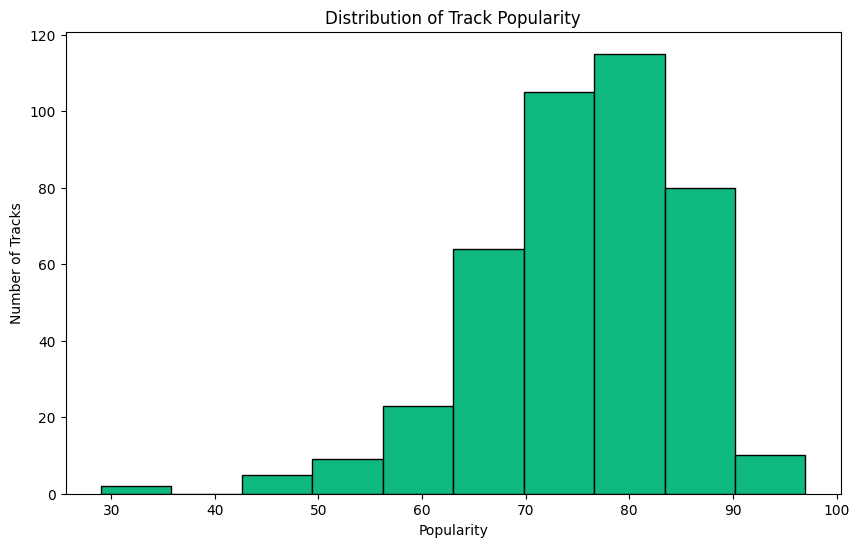

In [65]:
#2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

df4 = df4.drop_duplicates()

plt.figure(figsize=(10, 6))
plt.hist(df4['Popularity'], bins=10, color='#10b981', edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Track Popularity')
plt.show()

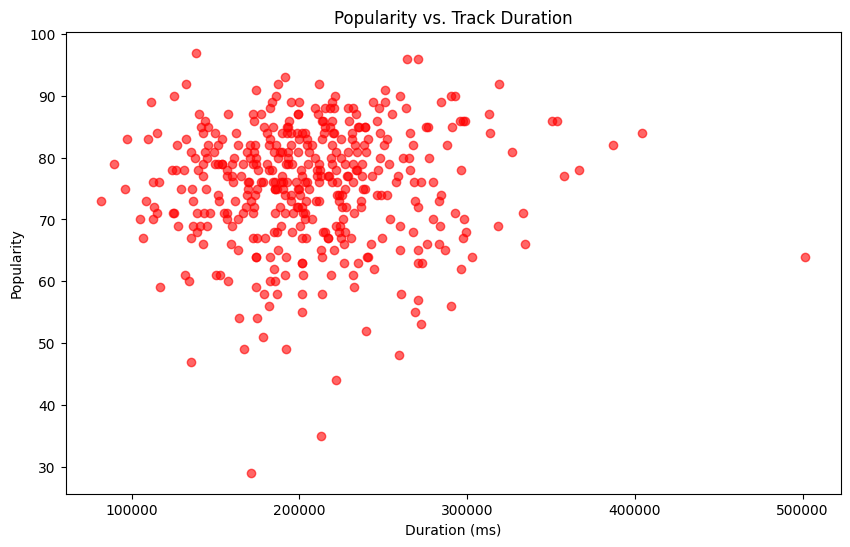

In [69]:
#3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df4['Duration (ms)'], df4['Popularity'], color='red', alpha=0.6)
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Popularity vs. Track Duration')
plt.show()

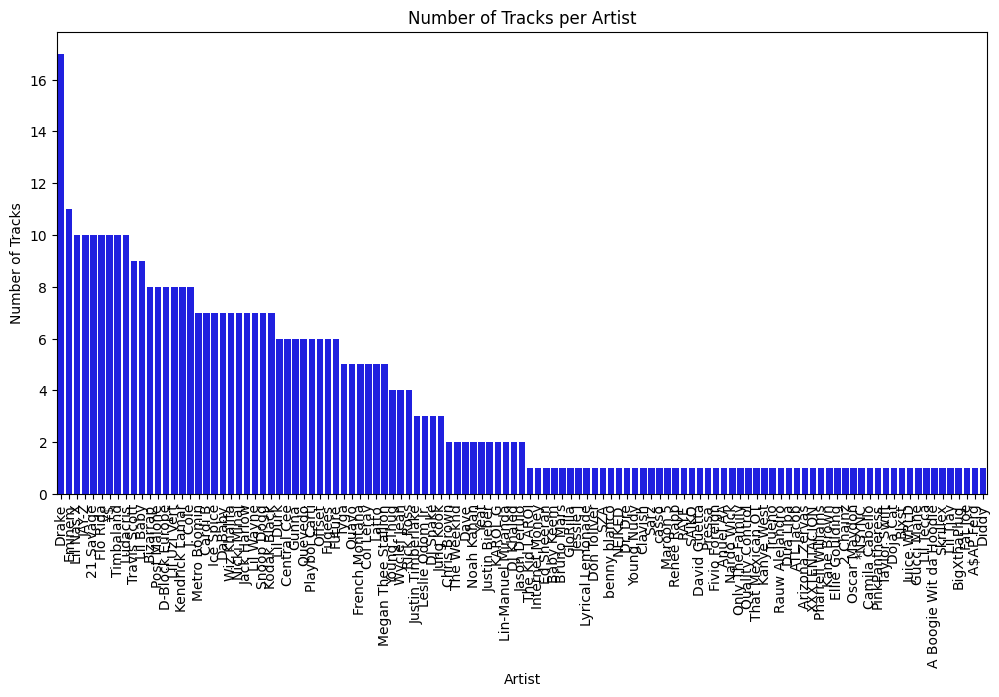

Artist with the highest number of tracks:


,count
Artist,
Drake,17


In [68]:
#4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df4, x='Artist', order=df4['Artist'].value_counts().index, color='blue')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.title('Number of Tracks per Artist')
plt.xticks(rotation=90)
plt.show()

artist_counts = df4['Artist'].value_counts()
print("Artist with the highest number of tracks:")
artist_counts.head(1)

In [70]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
least_popular = df4.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 least popular tracks:")
least_popular

Top 5 least popular tracks:


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [71]:
#6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate anddisplay the average popularity for each artist
artist_counts = df4['Artist'].value_counts()
top_5_artists = artist_counts.head(5).index
avg_popularity = df4[df4['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

print("Average popularity for top 5 artists by track count:")
print(avg_popularity)
print("\nArtist with highest average popularity:")
avg_popularity.head(1)

Average popularity for top 5 artists by track count:
Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64

Artist with highest average popularity:


,Popularity
Artist,
21 Savage,83.8


In [72]:
#7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
artist_counts = df4['Artist'].value_counts()
top_5_artists = artist_counts.head(5).index
most_popular = df4[df4['Artist'].isin(top_5_artists)].sort_values('Popularity', ascending=False)
most_popular_tracks = most_popular.groupby('Artist').first()[['Track Name', 'Popularity']]

print("Most popular tracks for top 5 artists:")
most_popular_tracks

Most popular tracks for top 5 artists:


,Track Name,Popularity
Artist,,
21 Savage,redrum,96
Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
Eminem,Without Me,90
JAY-Z,Ni**as In Paris,86
Lil Nas X,THATS WHAT I WANT,81


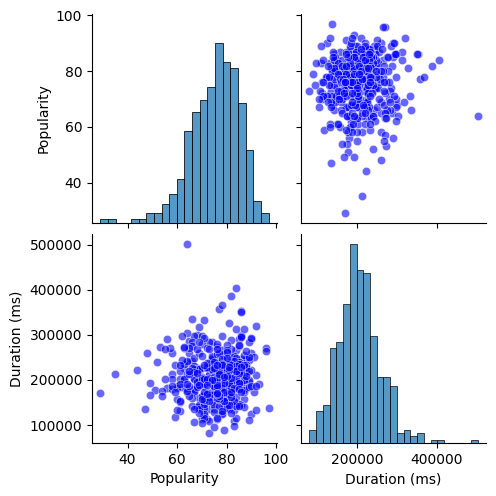

In [74]:
#8.Visualize relationships between multiple numerical variables simultaneously using a pair plot
sns.pairplot(df4[['Popularity', 'Duration (ms)']], diag_kind='hist', plot_kws={'color': 'blue', 'alpha': 0.6})
plt.show()

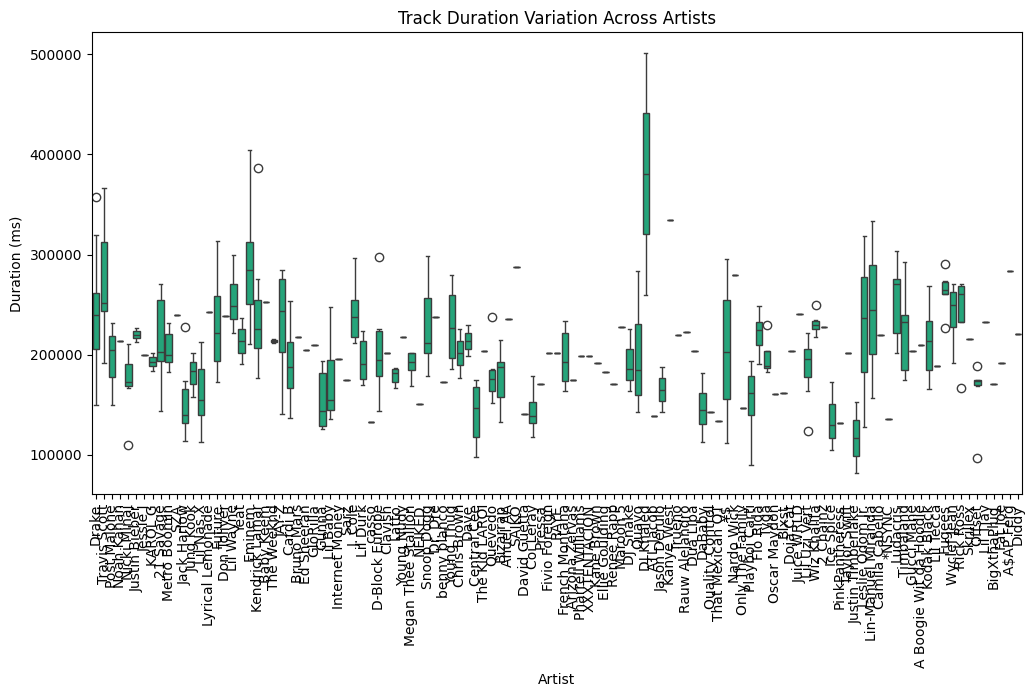

In [75]:
#9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df4, x='Artist', y='Duration (ms)', color='#10b981')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Track Duration Variation Across Artists')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 52.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 30.0% of the points cannot be plac

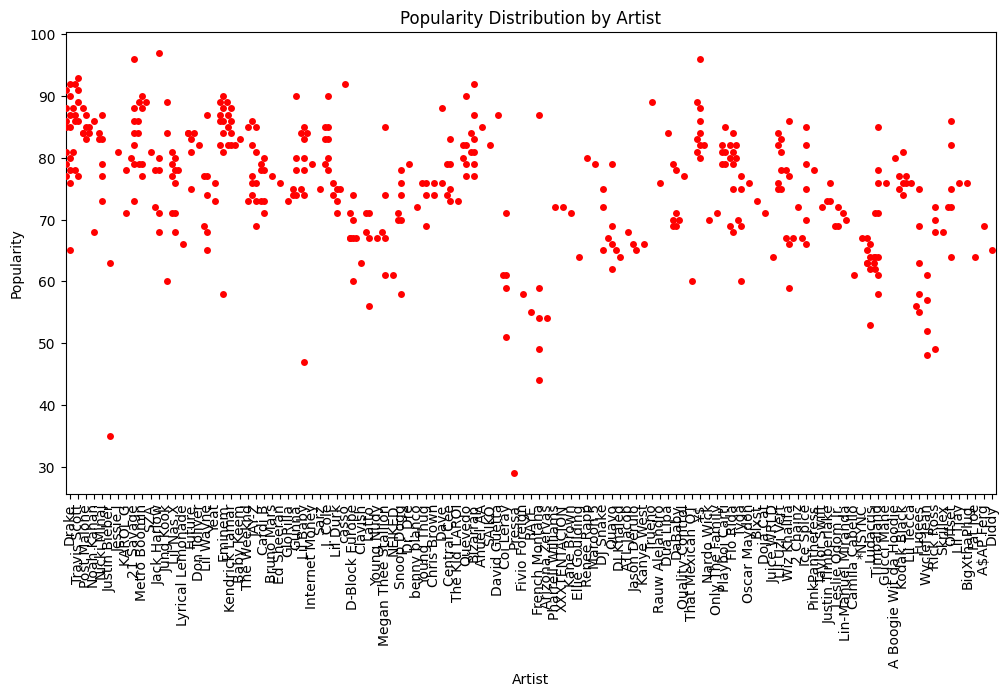

In [77]:
#10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df4, x='Artist', y='Popularity', color='red')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Popularity Distribution by Artist')
plt.xticks(rotation=90)
plt.show()